<a href="https://colab.research.google.com/github/songiangvn/AI-Machine-Learning-for-Coders/blob/main/Chapter_10_Creating_ML_Models_to_Predict_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10: Creating ML Models to Predict Sequences

Ở chương trước, chúng ta đã cùng tìm hiểu về dữ liệu chuỗi thời gian cũng như các phương pháp cơ bản để dự đoán chúng. Hôm nay, tụi mình sẽ cùng tìm hiểu sâu hơn về các phương pháp học máy để dự đoán nha. 💻  

Tuy nhiên, trước khi đi vào các mô hình dự đoán, tụi mình sẽ phải tìm hiểu về cấu trúc dữ liệu cần chuẩn bị để đưa vào mô hình nha.  
Về cơ bản thì khâu chuẩn bị này cũng không khác gì mấy ở chương trước, nhưng sẽ bài bản hơn khi mà phần dữ liệu này sẽ có tên gọi là **"windowed dataset"**. 🧩  

Đây là biểu đồ dữ liệu của tụi mình ở chương trước nha.

![real_data](https://github.com/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/images/Chapter_10/real_data.png?raw=true)

**Định nghĩa:** "windowed dataset" là một tập dữ liệu được tạo ra bằng cách chia dữ liệu thời gian thành các **"cửa sổ dữ liệu"** với mỗi cửa sổ chứa *n* giá trị liên tiếp tại các bước dữ liệu thời gian, đại diện cho **đặc trưng** đưa vào mô hình, và giá trị tiếp theo sẽ là **nhãn** của cửa sổ đó. 📊

Nếu bạn muốn dự đoán giá trị tại thời điểm **(t)** thì cần phải sử dụng **n** giá trị trước đó làm dữ liệu đầu vào. Trong đó, **n** chính là kích thước của **"cửa sổ dữ liệu"**. 🕒

**VD:** Định nghĩa **n = 30**. Để dự đoán giá trị tại thời điểm **t = 1200**, ta cần sử dụng các giá trị từ thời điểm **t = 1170 đến 1199**. 🔍

Đại khái là dùng n data đằng trước để predict 1 thằng data đằng sau

![windowed_data](https://github.com/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/images/Chapter_10/windowed_data.png?raw=true)

Vậy các giá trị tại thời điểm **t = 1970 đến 1999** sẽ được coi là phần **đặc trưng**, còn giá trị cần dự đoán tại thời điểm **t = 2000** được gọi là **nhãn**. 🎯

Tương tự như vậy, thông qua việc **trượt dài cửa sổ liên tục** trên bộ dữ liệu thời gian, ta sẽ thu được bộ dữ liệu mong muốn để huấn luyện mô hình, có tên gọi là **"windowed dataset"**. 🖥️

*P/s: Mình nghĩ mọi người nên dùng từ **windowed dataset** hơn nha. Nó là một thuật ngữ chuyên ngành á. Chúng ta có thể giải thích đơn giản là **window dataset** là bộ dữ liệu dạng chuỗi được tạo ra bằng phương pháp cửa sổ trượt.* 🚀

# Creating a Windowed Dataset 🏗️

Bây giờ, tụi mình sẽ tiến hành thử tạo ra **"Windowed dataset"** nha. 🚀

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import time as timer
from datetime import timedelta

In [ ]:
# Đoạn code này dùng để chia dữ liệu ban đầu thành các window

# Định nghĩa kích thước của cửa sổ dữ liệu
window_size = 4

# Tạo ra một dãy giá trị từ 0 đến 9 (bao gồm cả 9)
dataset = tf.data.Dataset.range(10)
# Hiển thị dữ liệu
print(f"Dữ liệu thô:\n{dataset}")
for d in dataset:
  print(d.numpy(), end=", ")
print()

# Dùng cửa sổ trượt để tạo ra các cửa sổ dữ liệu
dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
# Chúng ta cộng 1 vào đại diện cho nhãn của cửa sổ đó, một chập chúng ta sẽ cắt ra
# shift là số ô trượt trong một lần, drop_remainder để tự động loại bỏ các cửa sổ có số giá trị nhỏ hơn kích thước
# Hiển thị dữ liệu
print(f"\nDữ liệu sau khi áp dụng cửa sổ trượt:\n{dataset}")
for window_dataset in dataset:
    # window_dataset là một Dataset chứa các phần tử của một cửa sổ
    window_values = list(window_dataset.as_numpy_iterator())  # Trích xuất dữ liệu
    print(window_values)

# Dùng batch chuyển kiểu dữ liệu từ dataset thành tensorflow thông thường
dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
# Hiển thị dữ liệu
print(f"\nDữ liệu sau khi áp dụng batch:\n{dataset}")
for window in dataset:
batch_size = 2
dataset = dataset.shuffle(10).batch(batch_size).prefetch(1)
# prefetch giúp tăng tốc độ xử lý dữ liệu trong quá trình song song hóa, ở hiện tại sẽ đưa trước 1 batch vào.

# Hiển thị dữ liệu
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print(window.numpy())

Dữ liệu thô:
<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

Dữ liệu sau khi áp dụng cửa sổ trượt:
<_WindowDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>
[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]

Dữ liệu sau khi áp dụng batch:
<_FlatMapDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int64, name=None)>
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]



Sau khi đã chia thành các cửa sổ dữ liệu rồi, tụi mình sẽ tiến hành chia phần đặc trưng và nhãn ở các cửa sổ ra nha.

In [ ]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
# Hiển thị dữ liệu
print(f"\nDữ liệu sau khi chia đặc trưng và nhãn:\n{dataset}")
for x, y in dataset:
  print(x.numpy(), y.numpy())


Dữ liệu sau khi chia đặc trưng và nhãn:
<_MapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


Shuffle data và chia thành các batch

In [ ]:
batch_size = 2
dataset = dataset.shuffle(10).batch(batch_size).prefetch(1)
# prefetch giúp tăng tốc độ xử lý dữ liệu trong quá trình song song hóa, ở hiện tại sẽ đưa trước 1 batch vào.

# Hiển thị dữ liệu
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())


x =  [[4 5 6 7]
 [3 4 5 6]]
y =  [[8]
 [7]]
x =  [[0 1 2 3]
 [5 6 7 8]]
y =  [[4]
 [9]]
x =  [[2 3 4 5]
 [1 2 3 4]]
y =  [[6]
 [5]]


Ở trên là xáo trộn thứ tự của dữ liệu và chia thành các batch với size là batch_size

# Creating a Windowed Version of the Time Series Dataset 🌟

Bây giờ tụi mình tiến hành áp dụng phương pháp cửa sổ trượt này trên dữ liệu thời gian đã tạo ở chương 9 để tạo ra **windowed dataset** nha. 💻✨

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
  """
  Hàm này dùng để vẽ dữ liệu chuỗi thời gian trong một khung thời gian

  Tham số đầu vào:
  - time: khoảng thời gian xảy ra
  - series: chuỗi giá trị tương ứng trong thời gian đó
  - start: thời gian bắt đầu
  - end: thời gian kết thúc
  """

  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)


def trend(time, slope=0):
  """
  Hàm này giúp điều hướng xu hướng của dữ liệu, giống với phương trình bậc 1

  Tham số đầu vào:
  - time: khoảng thời gian xảy ra
  - slope: độ dốc của dữ liệu.
    + Nếu giá trị dương thì đường thẳng hưởng lên, ta có xu hướng Uptrend
    + Nếu giá trị âm thì chúng ta có xu hướng Downtrend

  Kết quả trả về:
  - series: danh sách giá trị theo xu hướng thời gian
  """
  return slope * time


def seasonal_pattern(season_time):
  """
  Hàm này dùng để tạo ra mẫu dữ liệu trong 1 mùa.
  Ở đây mình chia làm 2 pha tính, logic tính toán như sau nha:
  - Nếu thời gian mùa < 0.4, tiến hành tính theo dao động cosine: np.cos(season_time *2 *np.pi)
  - Nếu thời gian mùa > 0.4, tiến hành tính theo hàm suy giảm mũ:  1 / np.exp(3 * season_time)

  Tham số đầu vào:
  - thời gian của mùa

  Kết quả trả về:
  - res: kết quả tính ra được từ logic tính toán nằm trong khoảng [-1, 1]
  """
  res = np.where(season_time<0.4,
                 np.cos(season_time * 2 * np.pi),
                 1 / np.exp(3 * season_time))
  return res

def seasonality(time, period, amplitude=1, phase=0):
  """
  Hàm này để lặp lại, tạo nên thời gian cho các mùa nha.
  Logic tính toán sẽ như sau:
  - time % period sẽ ra giá trị trong khoảng [0, period - 1] -> tạo ra được các lần lặp thời gian của mùa [0->period-1, 0->period-1,...]
  - / period sẽ tiến hành chuẩn hóa lại thời gian của mùa về khoảng [0, 1]
  - Chạy seasion time vô hàm seasonal_pattern để tạo ra chuỗi giá trị tương ứng với dãy thời gian của các mùa, giá trị nằm trong khoảng [-1, 1]
  - amplitude * seasonal_pattern, ta tiến hành nhân biên độ dao động với chuỗi giá trị thì giá trị cuối cùng sẽ trong khoảng [-amplitude, amplitude]

  Tham số đầu vào:
  - time: khoảng thời gian xảy ra
  - period: khoảng thời gian của một mùa
  - amplitude: biên độ dao động tối đa của dữ liệu, ví dụ mình để là 15 thì sẽ dao động trong khoảng giá trị từ -15 đến 15
  - phase: độ lệch pha, ví dụ nếu ta gán 15, thay vì mùa vụ bắt đầu từ thời điểm t = 0 thì bị lệch đi 15 bước thời gian tức bắt đầu vào t = 15

  Kết quả trả về:
  - res: dữ liệu mang tính chu kỳ, mùa vụ
  """
  season_time = ((time + phase) % period) / period
  res = amplitude * seasonal_pattern(season_time)
  return res


def noise(time, noise_level=1, seed=None):
  """
  Hàm này để tạo tính nhiễu cho dữ liệu
  Logic tính toán như sau:
  - rnd.rand(len(time)) trả về một dãy giá trị có độ lớn trong khoảng [0,1),
   số lượng giá trị bằng số bước thời gian
  - Sau đó nhân với noise_level sẽ ra giá trị trong khoảng [0, noise_level)

  Tham số đầu vào:
  - time: khoảng thời gian xảy ra.
  - noise_level: cấp độ nhiễu của dữ liệu
  - seed: nếu để giá trị khác None, thì ở các lần chạy sau,
  khi giá trị seed bằng nhau thì giá trị ngẫu nhiên tạo ra cũng bằng nhau

  Kết quả đầu ra:
  - res: dữ liệu mang tính nhiếu
  """
  rnd = np.random.RandomState(seed)
  res = rnd.rand(len(time)) * noise_level
  return res

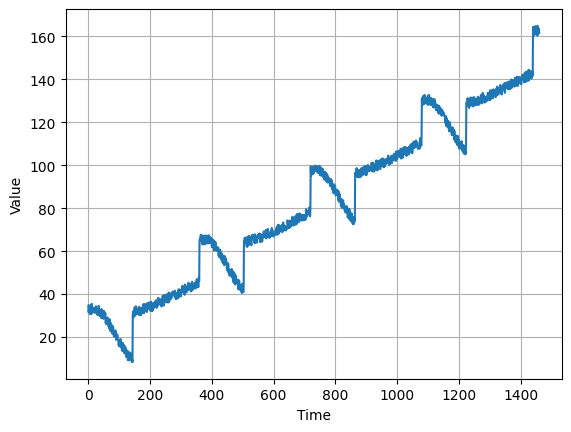

In [5]:
time = np.arange(4 * 365 + 1, dtype="float32")
# series = trend(time, 0.1)
# baseline = 10
# amplitude = 15
# slop = 0.09
# noise_level = 15
# period = 360

series = trend(time, 0.1)
baseline = 10
amplitude = 20
slop = 0.09
noise_level = 5
period = 360

series = baseline + trend(time, slop)
series += seasonality(time, period=period, amplitude=amplitude)
series += noise(time, noise_level, seed=42)
plot_series(time, series)

Ở trên đã tạo ra bộ dữ liệu time series giống như ở trang đằng trước. Ở dưới sẽ tiến hành tạo ra "windowed dataset" tức là sẽ chia dữ liệu thành các cửa sổ sau đó xáo trộn và chia thành các batch để phục vụ cho quá trình training

In [6]:
# Tiến hành tạo "windowed dataset"
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [7]:
# Chia tập training set và validation set
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

train_dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
print(train_dataset)

for feature, label in train_dataset.take(1):
  print(feature.numpy())
  print(label.numpy())

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>
[[ 71.299446   72.15622    72.62868    74.11887    73.81933    72.82219
   76.05066    74.22344    72.4573     71.85679    72.189      72.73142
   72.38208    72.58866    73.15856    72.67731    76.37173    72.366646
   74.66571    74.17291  ]
 [ 88.606964   88.30457    85.67219    83.72524    87.82421    86.83544
   83.005325   86.72749    86.214355   84.20108    84.3058     83.08763
   81.11035    82.2573     84.3413     80.096985   81.489265   81.56182
   82.008545   83.672905 ]
 [ 94.32918    95.02701    97.87051    97.63002    94.51603    95.53592
   95.62732    97.87766    94.66336    95.132324   98.65869    95.59952
   98.01856    95.994125   95.34915    96.116875   98.56176    99.27865
   99.201355   97.086586 ]
 [ 45.630634   45.097958   46.945744   46.037857   43.640224   43.25964
   46.200207   43.20205    46.07983    47.93363 

Xây dựng mô hình training predict với tập dữ liệu vừa tạo ra

In [ ]:
# Tiến hành định nghĩa mô hình
model = Sequential([
  tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Tiến hành huấn luyện mô hình
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1413.6625 - val_loss: 237.4841
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.0292 - val_loss: 25.8344
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.0592 - val_loss: 15.0480
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2673 - val_loss: 14.6982
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.4492 - val_loss: 15.5025
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1093 - val_loss: 15.1826
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.3039 - val_loss: 14.0231
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.4360 - val_loss: 13.8296
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.0759 - val_loss: 13.5391
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0608 - val_loss: 14.6858
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8458 - val_loss: 13.1614
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.0598 - val_loss: 13.0415
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 

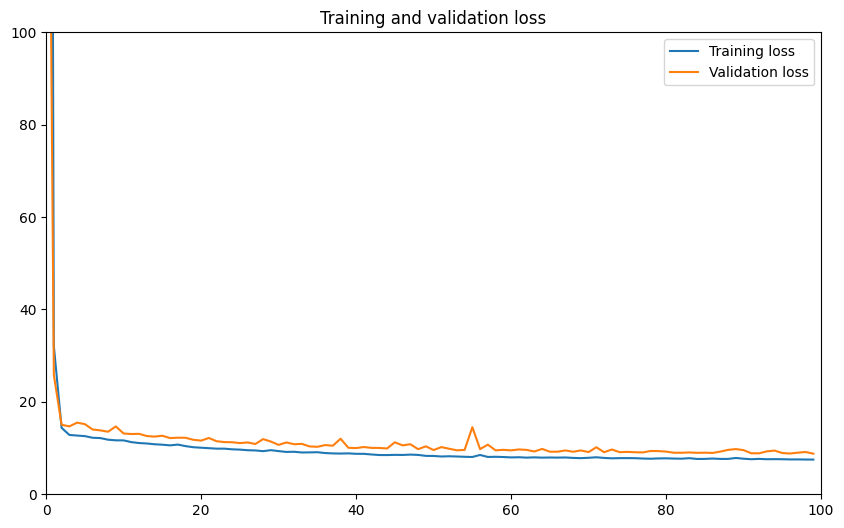

In [ ]:
# Vẽ biểu đồ huấn luyện
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.axis([0, 100, 0, 100]) # Vẽ biểu đồ trong khoảng này
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluating the Results of the DNN 📊

Sau khi huấn luyện mô hình, tụi mình sẽ tiến hành dự đoán thử và đánh giá nha. Có một lưu ý nhỏ là vì dữ liệu huấn luyện của chúng ta được tạo ra bằng phương pháp cửa sổ trượt nên chuỗi dữ liệu đưa vào mô hình để dự đoán cũng phải có độ dài tương tự cửa sổ trượt nha. 🔍

Để dự đoán giá trị tại một thời điểm, ta cần cung cấp chuỗi giá trị từ thời điểm **t** đến **t + window_size**. 📈

**VD:** Ta cần dự đoán giá trị tại thời điểm **t = 1020** với kích thước cửa sổ là 20, ta cần chuỗi giá trị từ thời điểm **t = 1000 đến 1019**. 🌟

In [ ]:
start_point = 1000
print(f"Chuỗi giá trị dùng để dự đoán:\n{series[start_point:start_point + window_size]}")
print(f"Giá trị thực tế: {series[start_point + window_size]}")
print(f"Giá trị dự đoán: {model.predict(series[start_point:start_point + window_size][np.newaxis])}")
# Dùng np.newaxis để định dạng lại kích thước (shape) dữ liệu đầu vào từ [window_size] sang [1, window_size]

Chuỗi giá trị dùng để dự đoán:
[102.865105 104.722855 106.45212  105.822685 106.26866  105.60421
 105.84623  106.70553  103.7827   105.056435 103.79042  107.69791
 107.555176 103.10745  106.51375  107.6878   104.04022  106.05299
 107.86673  103.53518 ]
Giá trị thực tế: 106.92880249023438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Giá trị dự đoán: [[106.63165]]


# Exploring the Overall Prediction 🔍

Bây giờ tụi mình sẽ tiến hành dự đoán giá trị tại tất cả bước thời gian để quan sát kết quả tổng quát của mô hình ha. 📈✨

In [ ]:
forecast = []
for t in range(len(series) - window_size): # Trừ window_size vì chúng ta cần dùng một số lượng dữ liệu ban đầu để dự đoán
  forecast.append(
      model.predict(series[t:t + window_size][np.newaxis], verbose = 0)
  )

Có một điểm nhỏ mà bạn có thể rút ra được là chúng ta sẽ không thể dự đoán được n giá trị tương ứng với kích thước của cửa sổ dữ liệu bởi chúng ta cần dùng n giá trị khởi đấu để dự đoán.

<ipython-input-16-4a9b982949e0>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


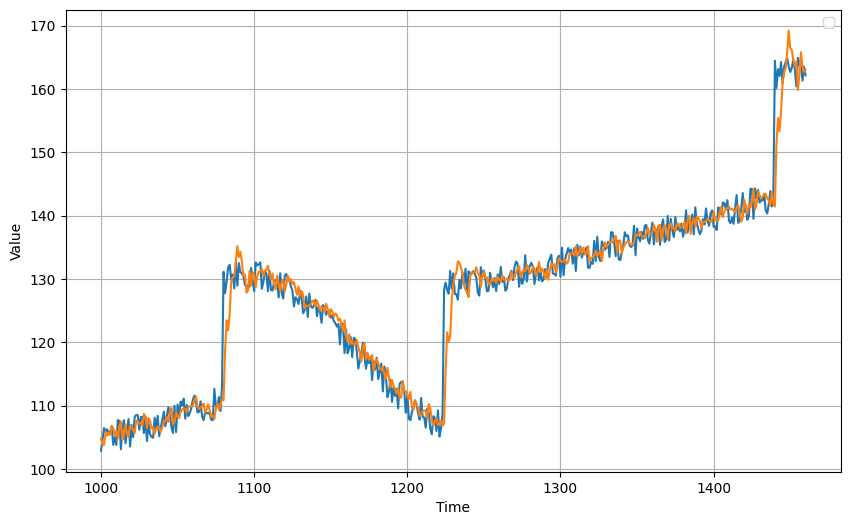

In [ ]:
# Vẽ biểu đồ dự đoán ở tập val tính từ thời điểm t = 1000
forecast_val = forecast[start_point - window_size:] # Chúng ta cần trừ đi windown_size do index bị lệch đi bởi không thể dự đoán được n giá tị khởi đầu.
results = np.array(forecast_val)[:, 0, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)
plt.legend()

Uầy, kết quả không tệ ha. 😄 Kết quả dự đoán có thể bám sát được với đường cong của giá trị thực tế. Tuy là ở những chỗ giá trị thay đổi đột ngột, mô hình hay giá trị dự đoán cần một ít thời gian để theo kịp, nhưng thật sự kết quả này cũng khá tuyệt rồi. 🌟

Bây giờ tụi mình sẽ sử dụng **MAE** để đánh giá hiệu quả của mô hình dựa trên kết quả dự đoán nha. 📊✨

In [ ]:
import keras
print(f"MAE của mô hình: {keras.metrics.mean_absolute_error(x_valid, results).numpy()}")

MAE của mô hình: 1.840787649154663


Vậy công việc tiếp theo của tụi mình để tối ưu hóa mô hình là giảm thiểu chỉ số **MAE** xuống thấp nhất có thể. 🎯 Chúng ta có thể thực hiện việc tối ưu hóa này bằng nhiều cách khác nhau, mà điển hình là tinh chỉnh các siêu tham số của mô hình. 🔧✨

Đến với phần tiếp theo, tụi mình sẽ tìm hiểu về các công cụ cũng như bộ tối ưu hóa để hỗ trợ thực hiện việc tối ưu hóa mô hình thuận tiện hơn. 🚀

# Tuning the Learning Rate 🔄

Đến với phần này, tụi mình sẽ hiệu chỉnh tốc độ học của mô hình nha. 🎯

Ở ví dụ trước đó, tụi mình đã tiến hành biên dịch mô hình như sau:

```python
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
```

Tuy nhiên, con số **1e-6** này có vẻ khá ngẫu nhiên ha, không có một căn cứ cụ thể nào cả. 🤔  

> **Vậy làm thế nào để có thể chọn ra learning rate một cách hợp lý?**

Rất may là trong TensorFlow có sẵn hàm để thực hiện việc này. 🛠️ Chúng ta sẽ sử dụng nó thông qua **callback**. Mọi người có thể nhớ lại một chút, chúng ta đã từng tiếp xúc với **callback** ở chương 2 rồi á, với cơ chế **early_stopping**. ⏳

Bây giờ tụi mình sẽ tiến hành lên lịch điều chỉnh cho learning rate với đoạn code dưới đây

In [ ]:
from keras.callbacks import LearningRateScheduler
lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

Ở hàm trên, chúng ta tiến hành định nghĩa giá trị khởi tạo ban đầu của **learning rate** bằng **1e-8**, sau đó sẽ tăng dần lên. 🔄 Mỗi lần **epoch** tăng lên đến các mốc chia hết cho 20, thì **learning rate** tăng lên gấp 10 lần. 📈

Bây giờ, chúng ta sẽ tiến hành ráp lại vào mô hình nha. 🛠️✨

In [ ]:
model = Sequential([
  tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(train_dataset, epochs=100, callbacks=[lr_schedule], validation_data=val_dataset)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 9148.1318 - val_loss: 11707.2617 - learning_rate: 1.0000e-08
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2233.1243 - val_loss: 3251.2783 - learning_rate: 1.1220e-08
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 817.5347 - val_loss: 1718.5813 - learning_rate: 1.2589e-08
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 432.1288 - val_loss: 814.0726 - learning_rate: 1.4125e-08
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 200.9234 - val_loss: 332.2038 - learning_rate: 1.5849e-08
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93.1220 - val_loss: 121.7508 - learning_rate: 1.7783e-08
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45.6674 - val_loss: 50.1977 - learning_rate: 1.9953e-08
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.0409 - val_loss: 31.9052 - learning_rate: 2.2387e-08
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.

(1e-08, 0.001, 0.0, 300.0)

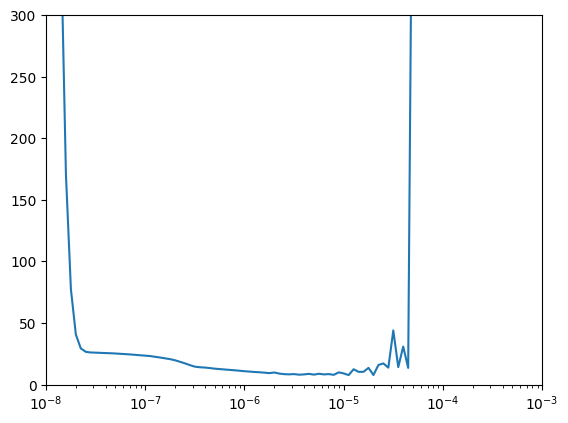

In [ ]:
# Vẽ biểu đồ đánh giá loss trên các learning rate
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

Nhìn có vẻ chỉ số learning rate **1e-5** có vẻ thấp hơn tí. Tụi mình sẽ tiến hành huấn luyện mô hình với learning rate = 1e-5 và đánh giá lại thử nha.

In [ ]:
model = Sequential([
  tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 401.3728 - val_loss: 32.0329
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4412 - val_loss: 15.9914
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.7494 - val_loss: 26.6674
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.9487 - val_loss: 20.2367
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0857 - val_loss: 17.5333
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.8984 - val_loss: 12.7901
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6779 - val_loss: 38.3734
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.2056 - val_loss: 11.5619
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4487 - val_loss: 9.6494
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3593 - val_loss: 18.6974
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1722 - val_loss: 9.4435
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

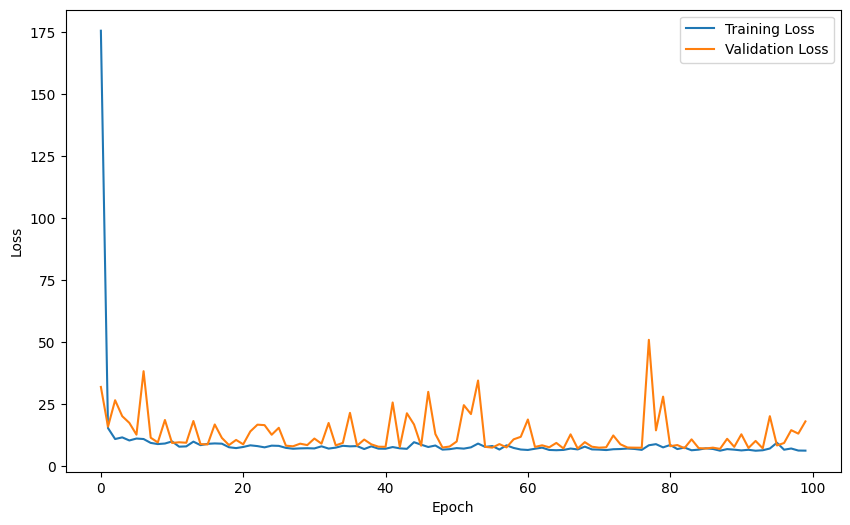

In [ ]:
# Biểu diễn quá trình huấn luyện
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Đồ thị ???

Kết quả đánh giá MAE có vẻ tệ hơn, tuy nhiên biết được learning rate tốt nhất là khoảng 1e-5

 Bây giờ, hãy thử mở rộng ra và tìm hiểu thêm nhiều phương pháp khác để tối ưu hóa xem. Một trong những cách dễ nhất mà tụi mình có thể suy nghĩ đến là **tăng kích thước cửa sổ trượt**, để mô hình có thể học nhiều hơn từ dữ liệu đầu vào. 📊✨

Ở đây, mình sẽ tiến hành tăng kích thước cửa sổ trượt lên **40** để xem thử kết quả nha. 🚀

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 40
batch_size = 32
shuffle_buffer_size = 1000

train_dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
print(train_dataset)

for feature, label in train_dataset.take(1):
  print(feature.numpy())
  print(label.numpy())

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>
[[ 67.836685  67.22067   67.697914 ...  68.741684  69.776245  67.36683 ]
 [ 62.174892  61.063763  60.089912 ...  53.032974  52.10312   54.255054]
 [ 75.51946   76.651596  74.81104  ...  97.87766   94.66336   95.132324]
 ...
 [102.680824 101.36362  101.44452  ... 103.32513  104.36145  103.16548 ]
 [  8.405991   9.506027   8.401681 ...  35.241253  31.297552  32.367935]
 [ 64.42697   66.16661   67.422935 ...  67.55138   68.1672    67.72702 ]]
[ 67.533646   50.02086    98.65869    88.606964   97.219696   76.82948
  53.032974   42.284294   67.41175    33.267143   98.93974    15.5200815
 102.713875   97.3207     67.08271    67.967636   30.408087   31.030901
  42.566196   23.894941   43.171486   80.096985  100.616936   66.06839
  98.99143    72.4573     56.465134   67.63639    17.560322  102.295425
  31.282938   67.35339  ]


In [ ]:
model = Sequential([
  tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 593.8586 - val_loss: 248.0154
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 57.9744 - val_loss: 133.5928
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.6340 - val_loss: 61.5974
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.2414 - val_loss: 68.6556
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.7597 - val_loss: 17.4646
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0202 - val_loss: 14.6790
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7047 - val_loss: 13.2741
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.5494 - val_loss: 13.7694
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5785 - val_loss: 11.4970
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.6473 - val_loss: 25.0431
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12.3113 - val_loss: 15.5744
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━

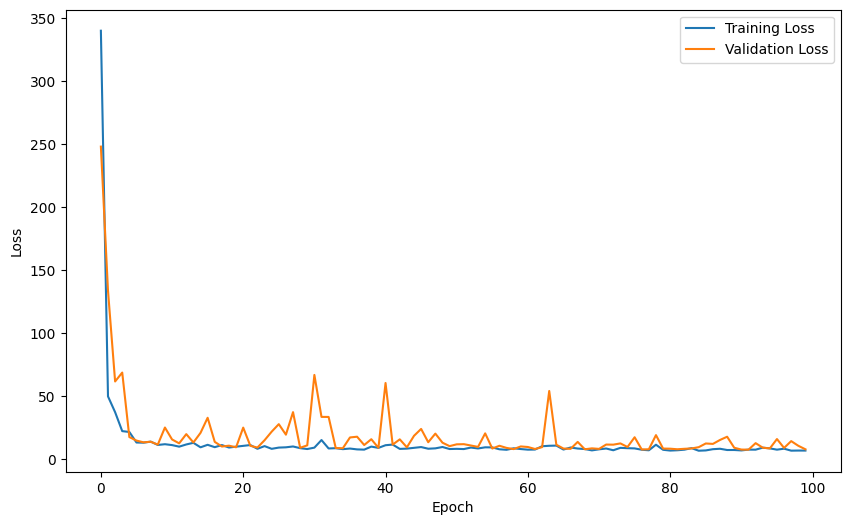

In [ ]:
# Biểu diễn quá trình huấn luyện
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
forecast = []
for t in range(len(series) - window_size): # Trừ window_size vì chúng ta cần dùng một số lượng dữ liệu ban đầu để dự đoán
  forecast.append(
      model.predict(series[t:t + window_size][np.newaxis], verbose = 0)
  )

<ipython-input-27-4a9b982949e0>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


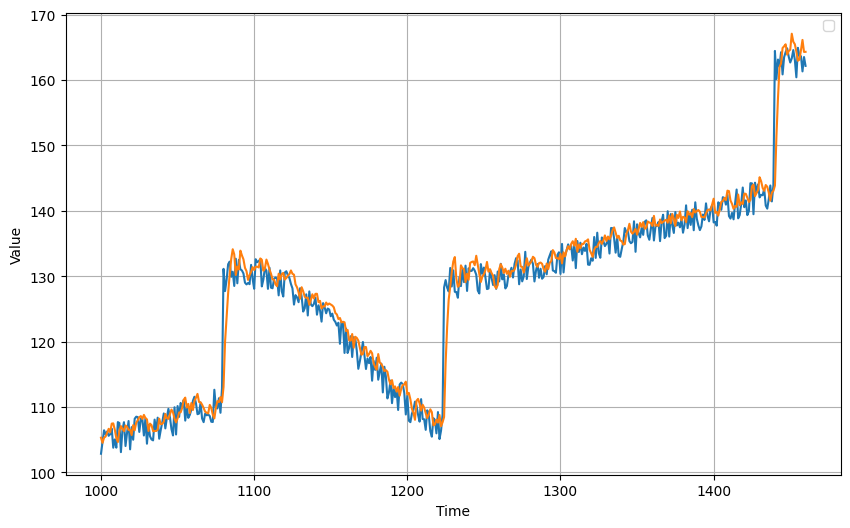

In [ ]:
# Vẽ biểu đồ dự đoán ở tập val tính từ thời điểm t = 1000
forecast_val = forecast[start_point - window_size:] # Chúng ta cần trừ đi windown_size do index bị lệch đi bởi không thể dự đoán được n giá tị khởi đầu.
results = np.array(forecast_val)[:, 0, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)
plt.legend()

In [ ]:
# Tiến hành đánh giá MAE
print(f"MAE của mô hình: {keras.metrics.mean_absolute_error(x_valid, results).numpy()}")

MAE của mô hình: 1.8488438129425049


Có thể thấy kết quả dựa trên đánh giá MAE đã được cải thiện rõ rệt

# Exploring Hyperparameter Tuning with Keras Tuner 🔧✨

Bây giờ, tụi mình sẽ tiến hành tối ưu hóa các siêu tham số với công cụ **Keras Tuner** nha. 🚀

Nói đơn giản, với mỗi siêu tham số, chúng ta sẽ có vài lựa chọn. Khi thay đổi nhiều siêu tham số, chúng sẽ tạo ra số tổ hợp lựa chọn vô cùng lớn mà chúng ta cần phải thử nghiệm. 🔄 Điều này đồng nghĩa với việc phải thiết kế mô hình cho từng tổ hợp siêu tham số và huấn luyện từng cái một. 🧪

Việc này khá rắc rối và tốn rất nhiều thời gian. ⏳ Do đó, để tiện cho việc lập trình và thử nghiệm, công cụ **Keras Tuner** được ra đời. 🌟

In [1]:
# Tải bộ công cụ
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


Sơ lược về công cụ **Keras Tuner**, nó sẽ giúp chúng ta thử nghiệm hàng loạt các siêu tham số thông qua việc chỉ định phạm vi giá trị hoặc các giá trị cần thử nghiệm. 🔄 Sau đó, công cụ này sẽ tiến hành huấn luyện một loạt các mô hình dựa trên từng tổ hợp siêu tham số và trả về các mô hình có kết quả đánh giá tốt nhất. 📊✨

Tất nhiên, mọi người cũng có thể chỉ định các thang đo riêng để đánh giá kết quả, tùy thuộc vào mục tiêu cụ thể của mình. 🎯

Bây giờ, tụi mình đi vào ví dụ để dễ hiểu hơn nha. Thông thường, tụi mình sẽ định nghĩa một lớp **dense** như đoạn code dưới đây:

```python
Dense(10, input_shape=[window_size], activation="relu")
```

Tuy nhiên, làm sao tụi mình có thể chắc chắn được số **10** là lựa chọn tốt nhất? 🤔 Nó khá là ngẫu nhiên. Nếu bây giờ tụi mình muốn thử nghiệm một loạt các số neuron khác nhau cho lớp **Dense** này thì sao? 🛠️ Chẳng hạn như các giá trị trong khoảng từ **10 đến 30**, tụi mình có thể điều chỉnh lại phần siêu tham số như sau:

```python
Dense(units=hp.Int('units', min_value=10,
                    max_value=30, step=2),
                    activation='relu',
                    input_shape=[window_size])
```

Ở đây, mình định nghĩa các giá trị trong khoảng từ **10 đến 30**, với bước nhảy là **2**. Vậy là, ta sẽ có **11 lớp Dense** với số neuron khác nhau. Công cụ sẽ tiến hành huấn luyện mô hình **11 lần** để tìm ra số neuron tối ưu nhất. 🎯

Tương tự, tụi mình cũng có thể điều chỉnh **momentum** của hàm tối ưu bằng cách:

```python
optimizer=SGD(hp.Choice('momentum', values=[.9, .7, .5, .3], lr=1e-5))
```

Dị là, nếu kết hợp việc tối ưu hóa cả **optimizer** và lớp **Dense**, thì tụi mình sẽ có tổng cộng **44 tổ hợp**, tương ứng với **44 lần huấn luyện mô hình**. 📊✨

In [8]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=30, step=2),
                    activation='relu', input_shape=[window_size]))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    # Pass learning rate as 'learning_rate' in compile
    model.compile(loss='mse',
                  optimizer=SGD(learning_rate=1e-5,
                                momentum=hp.Choice('momentum', values=[.9, .7, .5, .3])))

    return model

Bây giờ tụi mình sẽ tiến hành tạo một đối tượng RandomSearch để quản lý các lần lặp huấn luyện mô hình nha.

In [11]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(build_model,
                     objective='val_loss', max_trials=150,
                     executions_per_trial=3, directory='models',
                     project_name='optimize_model')

Mình sẽ giải thích một số tham số của hàm để mọi người dễ hiểu hơn nha:  

- **objective**: Chỉ định mục tiêu cần tối ưu hóa. Ở đây, mục tiêu là **loss**, với mong muốn giảm nó xuống mức thấp nhất có thể. 🎯  
- **max_trials**: Giới hạn tổng số lần thử nghiệm tối đa. Điều này rất hữu ích trong trường hợp số lượng tổ hợp quá lớn, vì nếu huấn luyện hết sẽ tốn rất nhiều thời gian. Ví dụ, với 44 tổ hợp, ta có thể giới hạn lại bằng **20**, nghĩa là chỉ huấn luyện **20 lần** thay vì toàn bộ. ⏳  
- **execution_per_trial**: Số lần huấn luyện cho mỗi tổ hợp. Thay vì huấn luyện mỗi tổ hợp chỉ **1 lần**, bạn có thể tăng số lần huấn luyện để giảm thiểu sai lệch do ngẫu nhiên trong quá trình huấn luyện. Kết quả báo cáo sẽ là trung bình của các lần huấn luyện đó. 📊  
- **directory**: Chỉ định thư mục lưu lại lịch sử tìm kiếm. Thư mục này sẽ chứa tất cả dữ liệu liên quan đến các lần huấn luyện và tối ưu hóa. 🗂️  
- **project_name**: Chỉ định tên dự án lưu trong thư mục **directory**. Dữ liệu của dự án sẽ được lưu trong một thư mục con có tên tương ứng, giúp tổ chức thông tin một cách gọn gàng. 🛠️  

Giờ thì tụi mình tiến hành chạy huấn luyện để tìm kiếm kiến trúc mô hình tốt nhất ha. 🚀✨

In [12]:
start_time = timer.time()
tuner.search(train_dataset, epochs=100, verbose=0, validation_data=val_dataset)
end_time = timer.time()

In [13]:
print(f"Tổng thời gian huấn luyện: {str(timedelta(seconds=end_time - start_time))}")

Tổng thời gian huấn luyện: 1:21:08.804156


Bây giờ tụi mình sẽ tiến hành xem kết quả đánh giá nha, mặc định thì chúng sẽ hiển thị 10 tổ hợp hay kiến trúc mô hình tốt nhất ra.

In [14]:
tuner.results_summary()

Results summary
Results in models/optimize_model
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 029 summary
Hyperparameters:
units: 26
momentum: 0.9
Score: 6.700234731038411

Trial 038 summary
Hyperparameters:
units: 12
momentum: 0.9
Score: 6.706965446472168

Trial 000 summary
Hyperparameters:
units: 22
momentum: 0.9
Score: 6.744105339050293

Trial 018 summary
Hyperparameters:
units: 10
momentum: 0.9
Score: 6.905900001525879

Trial 016 summary
Hyperparameters:
units: 14
momentum: 0.9
Score: 6.9184285799662275

Trial 030 summary
Hyperparameters:
units: 30
momentum: 0.7
Score: 7.008918126424153

Trial 041 summary
Hyperparameters:
units: 30
momentum: 0.5
Score: 7.110648473103841

Trial 026 summary
Hyperparameters:
units: 16
momentum: 0.7
Score: 7.1495254834493

Trial 025 summary
Hyperparameters:
units: 16
momentum: 0.9
Score: 7.201039950052897

Trial 012 summary
Hyperparameters:
units: 28
momentum: 0.7
Score: 7.4555589358011884


Ở đây mình thấy tổ hợp hiệu quả nhất là  
> units: 26
momentum: 0.9  

Mọi người có thể huấn luyện lại mô hình với tổ hợp trên hoặc chọn lấy hẳn mô hình đã huấn luyện trong tuner ra luôn nha. Như đoạn code dưới đây là mình lấy ra 4 mô hình hiệu quả nhất và lấy mô hình đầu tiên tương ứng với mô hình tốt nhất để dự đoán. 🌟

In [15]:
models = tuner.get_best_models(num_models=4)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
best_model = models[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 26)                  │             546 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 827 (3.23 KB)

 Trainable params: 827 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
forecast = []
for t in range(len(series) - window_size): # Trừ window_size vì chúng ta cần dùng một số lượng dữ liệu ban đầu để dự đoán
  forecast.append(
      best_model.predict(series[t:t + window_size][np.newaxis], verbose = 0)
  )

<ipython-input-19-ae210750ac45>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


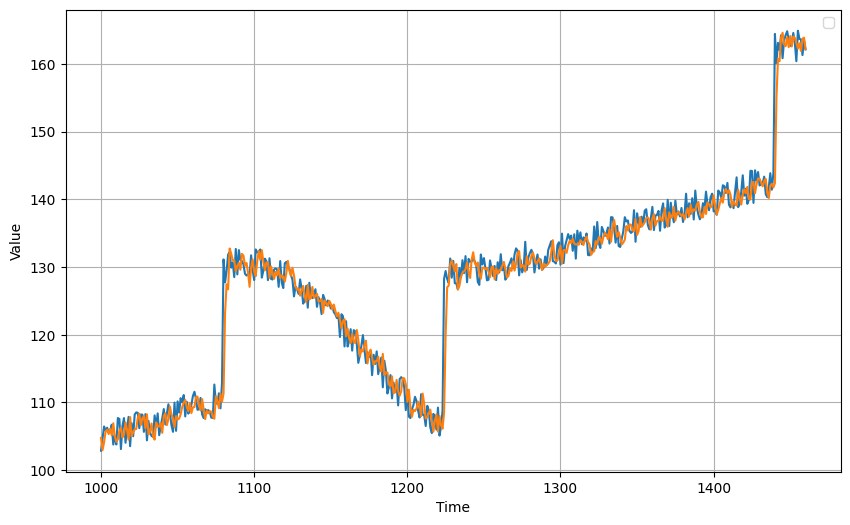

In [19]:
# Vẽ biểu đồ dự đoán ở tập val tính từ thời điểm t = 1000
start_point = 1000
forecast_val = forecast[start_point - window_size:] # Chúng ta cần trừ đi windown_size do index bị lệch đi bởi không thể dự đoán được n giá tị khởi đầu.
results = np.array(forecast_val)[:, 0, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)
plt.legend()

In [21]:
# Tiến hành đánh giá MAE
import keras
print(f"MAE của mô hình: {keras.metrics.mean_absolute_error(x_valid, results).numpy()}")

MAE của mô hình: 1.7161070108413696


Đã tốt hơn do chuyển thành val_loss, tuy nhiên train lâu vãi:))

Như vậy là mọi người đã biết được cách để có thể tiết kiệm thời gian trong việc tối ưu hóa, chọn ra các bộ tham số tốt nhất cho mô hình rồi. Mọi người có thể thử thêm nhiều lựa chọn khác nữa và quan sát để cải thiện mô hình thêm nha. 😊

# Summary  
Tổng kết chương 10 này, tụi mình đã học được:  
- Cách xử lý dữ liệu thời gian để đưa vào mô hình với cửa sổ trượt hay cửa sổ dữ liệu.  
- Cách dự đoán và đánh giá mô hình.  
- Cách sử dụng công cụ **Keras Tuner** để cải thiện quá trình tối ưu hóa mô hình. ✅📘